## Data Processing

In [1]:
import os
import xml.etree.ElementTree as ET
from pathlib import Path
import cv2 as cv
from dataclasses import dataclass, field
from typing import List
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [61]:
annotation_path = "../data/raw/VOC2007/Annotations/000016.xml"
tree = ET.parse(annotation_path)
root = tree.getroot()

In [62]:
for i in tree.iter():
    print(i.tag)

annotation
folder
filename
source
database
annotation
image
flickrid
owner
flickrid
name
size
width
height
depth
segmented
object
name
pose
truncated
difficult
bndbox
xmin
ymin
xmax
ymax


In [63]:
objects = []
for obj in root.findall("object"):
    class_name = obj.find("name").text
    bbox = obj.find("bndbox")
    xmin = int(bbox.find("xmin").text)
    ymin = int(bbox.find("ymin").text)
    xmax = int(bbox.find("xmax").text)
    ymax = int(bbox.find("ymax").text)
    objects.append({"class": class_name, "bbox": [xmin, ymin, xmax, ymax]})

In [64]:
objects

[{'class': 'bicycle', 'bbox': [92, 72, 305, 473]}]

In [65]:
image_path = "../data/raw/VOC2007/JPEGImages/000016.jpg"  # Example
image = cv.imread(image_path)


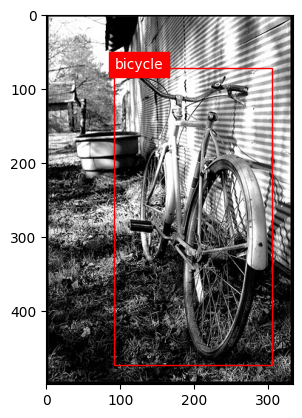

In [66]:
# Create a figure and axes for visualization
fig, ax = plt.subplots(1)
ax.imshow(image)

# Draw bounding boxes
for obj in objects:
    xmin, ymin, xmax, ymax = obj["bbox"]
    rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor="r", facecolor="none")
    ax.add_patch(rect)
    ax.text(xmin, ymin, obj["class"], color="white", fontsize=10, backgroundcolor="red")
    
plt.grid(False)
plt.show()

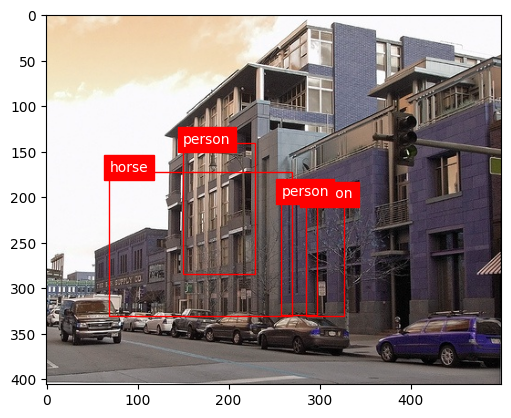

In [60]:
# Create a figure and axes for visualization
fig, ax = plt.subplots(1)
ax.imshow(image)

# Draw bounding boxes
for obj in objects:
    xmin, ymin, xmax, ymax = obj["bbox"]
    rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor="r", facecolor="none")
    ax.add_patch(rect)
    ax.text(xmin, ymin, obj["class"], color="white", fontsize=10, backgroundcolor="red")
    
plt.grid(False)
plt.show()

In [34]:
# Define data structure
@dataclass
class BoundingBox:
    xmin: int
    ymin: int
    xmax: int
    ymax: int

@dataclass
class ObjectAnnotation:
    class_name: str
    bbox: BoundingBox

@dataclass
class ImageData:
    filename: str
    filepath: str
    width: int
    height: int
    image: np.ndarray = None
    objects: List[ObjectAnnotation] = field(default_factory=list)

In [35]:
image_path = Path.cwd()
str(image_path.parent / "data/raw")

'/home/joluseti/projects/object-detection-tracking/data/raw'

In [36]:
ROOT_DIR = Path.cwd().parent
image_path = ROOT_DIR / "data" / "raw" / "VOC2007" / "JPEGImages"
annotation_path = ROOT_DIR / "data"/"raw"/"VOC2007" /"Annotations"

In [37]:
image_path

PosixPath('/home/joluseti/projects/object-detection-tracking/data/raw/VOC2007/JPEGImages')

In [39]:
def get_sample(image_path, annotation_path):
    tree = ET.parse(annotation_path)
    root = tree.getroot()

    filename = root.find("filename").text
    filepath = image_path
    width = int(root.find("size/width").text)
    height = int(root.find("size/height").text)
    image = cv.imread(image_path)
    objects = []
    
    for obj in root.findall("object"):
        class_name = obj.find("name").text
        xmin = int(obj.find("bndbox/xmin").text)
        ymin = int(obj.find("bndbox/ymin").text)
        xmax = int(obj.find("bndbox/xmax").text)
        ymax = int(obj.find("bndbox/ymax").text)
        objects.append(ObjectAnnotation(class_name, BoundingBox(xmin, ymin, xmax, ymax)))
    
    return ImageData(filename, filepath, width, height, image, objects)   

In [42]:
test_image = list(image_path.rglob("*"))[0]  #gets all files in image path directory, makes a list and index the 1st image 
test_annot = list(annotation_path.rglob("*"))[0]

In [41]:
test_image

PosixPath('/home/joluseti/projects/object-detection-tracking/data/raw/VOC2007/JPEGImages/000001.jpg')

In [43]:
test = get_sample(image_path=test_image, annotation_path=test_annot)

In [44]:
test

ImageData(filename='000001.jpg', filepath=PosixPath('/home/joluseti/projects/object-detection-tracking/data/raw/VOC2007/JPEGImages/000001.jpg'), width=353, height=500, image=array([[[  0,   1,   1],
        [  0,   1,   1],
        [  0,   1,   1],
        ...,
        [  3,   4,   2],
        [  3,   4,   2],
        [  2,   3,   1]],

       [[  0,   1,   1],
        [  0,   1,   1],
        [  0,   1,   1],
        ...,
        [  4,   5,   3],
        [  3,   4,   2],
        [  2,   3,   1]],

       [[  0,   1,   1],
        [  0,   1,   1],
        [  0,   1,   1],
        ...,
        [  5,   6,   4],
        [  3,   4,   2],
        [  2,   2,   2]],

       ...,

       [[ 95,  54,  45],
        [ 63,  25,  13],
        [ 77,  42,  28],
        ...,
        [114,  54,  24],
        [114,  54,  25],
        [117,  51,  26]],

       [[ 64,  25,  16],
        [ 64,  29,  16],
        [103,  70,  55],
        ...,
        [122,  62,  32],
        [121,  61,  32],
        [123,  

In [45]:
def create_data_splits(dataset_root):

    try:
        dataset_root = Path(dataset_root)
        voc_07_dir = dataset_root / "VOC2007"
        voc_12_dir = dataset_root / "VOC2012"
        voc_07_image_dir = voc_07_dir / "JPEGImages"
        voc_12_image_dir = voc_12_dir / "JPEGImages"
        voc_07_annotation_dir = voc_07_dir / "Annotations"
        voc_12_annotation_dir = voc_12_dir / "Annotations"
        voc_07_data_dir = voc_07_dir / "ImageSets" / "Main"
        voc_12_data_dir = voc_12_dir / "ImageSets" / "Main"
        
        train_file_07 = voc_07_data_dir / "trainval.txt"
        train_file_12 = voc_12_data_dir / "trainval.txt"
        test_file = voc_07_data_dir / "test.txt"

    except (ValueError) as e:
        raise ValueError(f"")


    train_paths_07 = [(voc_07_image_dir / f"{image_name}.jpg", voc_07_annotation_dir / f"{image_name}.xml") for image_name in train_file_07.read_text().splitlines() if image_name]
    train_paths_12 = [(voc_12_image_dir / f"{image_name}.jpg", voc_12_annotation_dir / f"{image_name}.xml") for image_name in train_file_12.read_text().splitlines() if image_name]

    train_paths = train_paths_07 + train_paths_12

    test_paths = [(voc_07_image_dir / f"{image_name}.jpg", voc_07_annotation_dir / f"{image_name}.xml") for image_name in test_file.read_text().splitlines() if image_name]

    train_data = []
    test_data = []

    for image_path, annotation_path in train_paths:
        data_sample = get_sample(image_path, annotation_path)
        train_data.append(data_sample)

    for image_path, annotation_path in test_paths:
        data_sample = get_sample(image_path, annotation_path)
        test_data.append(data_sample)
    
    return train_data, test_data 

In [46]:
train_data, test_data = create_data_splits(dataset_root = ROOT_DIR / "data" / "raw")

In [47]:
len(train_data)

16551

In [48]:
len(test_data)

4952

In [70]:
for i, item in enumerate(train_data):
    print(f"Width {item.width}, Height {item.height}, BBox example {item.objects[0]}")
    if i == 5:
        break

Width 500, Height 375, BBox example ObjectAnnotation(class_name='chair', bbox=BoundingBox(xmin=263, ymin=211, xmax=324, ymax=339))
Width 500, Height 333, BBox example ObjectAnnotation(class_name='car', bbox=BoundingBox(xmin=141, ymin=50, xmax=500, ymax=330))
Width 500, Height 375, BBox example ObjectAnnotation(class_name='horse', bbox=BoundingBox(xmin=69, ymin=172, xmax=270, ymax=330))
Width 500, Height 333, BBox example ObjectAnnotation(class_name='car', bbox=BoundingBox(xmin=156, ymin=97, xmax=351, ymax=270))
Width 334, Height 500, BBox example ObjectAnnotation(class_name='bicycle', bbox=BoundingBox(xmin=92, ymin=72, xmax=305, ymax=473))
Width 480, Height 364, BBox example ObjectAnnotation(class_name='person', bbox=BoundingBox(xmin=185, ymin=62, xmax=279, ymax=199))


In [73]:
VOC_CLASSES = {
    'person': 0,
    'bird': 1,
    'cat': 2,
    'cow': 3,
    'dog': 4,
    'horse': 5,
    'sheep': 6,
    'aeroplane': 7,
    'bicycle': 8,
    'boat': 9,
    'bus': 10,
    'car': 11,
    'motorbike': 12,
    'train': 13,
    'bottle': 14,
    'chair': 15,
    'diningtable': 16,
    'pottedplant': 17,
    'sofa': 18,
    'tvmonitor': 19
}

### Model Tests

In [50]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms

In [ ]:
def preprocess(image_data, target_size=(224,224)):
    

In [51]:
## Model Configs
NUM_CLASSES =  20

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        nn.Sequential = [nn.Conv2d]


In [ ]:
DataLoader()